# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 8 + 2.0 * x + e
* e estará distribuida según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5*np.random.randn(100)

In [3]:
#Residuos
res = 0 + 0.8*np.random.randn(100)

In [4]:
y_pred = 8 + 2.0*x

In [5]:
y_act = 8 + 2.0*x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,3.960046,14.886840,15.920093
1,0.179282,7.639375,8.358563
2,3.055286,15.051577,14.110573
3,-1.746960,4.298839,4.506081
4,2.637057,13.290815,13.274113


In [9]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

In [10]:
%matplotlib inline

Text(0.5,1,'Valor Actual vs Predicción')

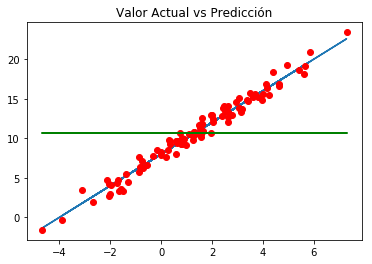

In [11]:
plt.plot(x,y_pred) #Color azul
plt.plot(x,y_act, "ro") #Color rojo
plt.plot(x,y_mean, "g") #Color verde
plt.title("Valor Actual vs Predicción")

In [12]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.960046,14.886840,15.920093,27.130919,1.067610,17.434657
1,0.179282,7.639375,8.358563,5.535641,0.517232,9.437080
2,3.055286,15.051577,14.110573,11.554663,0.885489,18.837502
3,-1.746960,4.298839,4.506081,38.505462,0.042949,41.120400
4,2.637057,13.290815,13.274113,6.567717,0.000279,6.653599


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

2051.073645882812

In [16]:
SSD

55.77167098336149

In [17]:
SST

2179.5884258450096

In [18]:
SSR + SSD

2106.8453168661736

In [19]:
R2 = SSR/SST

In [20]:
R2

0.9410371341495936

(array([49., 17.,  4., 13.,  4.,  6.,  2.,  2.,  1.,  2.]),
 array([5.95312588e-12, 2.75543566e-01, 5.51087132e-01, 8.26630699e-01,
        1.10217426e+00, 1.37771783e+00, 1.65326140e+00, 1.92880496e+00,
        2.20434853e+00, 2.47989210e+00, 2.75543566e+00]),
 <a list of 10 Patch objects>)

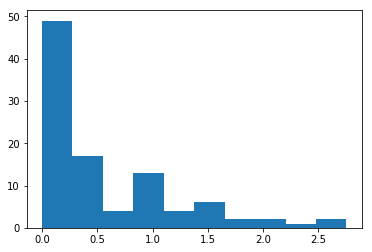

In [21]:
plt.hist(data["SSD"])

(array([ 3.,  6., 13., 13., 17., 15., 13.,  8., 10.,  2.]),
 array([-1.6599505 , -1.33259767, -1.00524483, -0.677892  , -0.35053916,
        -0.02318633,  0.3041665 ,  0.63151934,  0.95887217,  1.286225  ,
         1.61357784]),
 <a list of 10 Patch objects>)

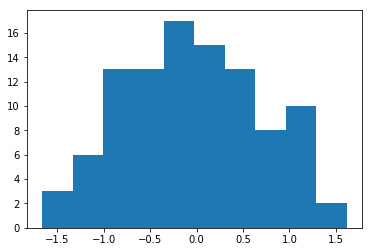

In [22]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((x_i - x_m)*(y_i - y_m))/sum((x_i - x_m)^2)
* a = y_m - b * x_m

In [23]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.3388305274801986, 10.711357671813259)

In [29]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [31]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [32]:
alpha = y_mean - beta*x_mean

In [33]:
alpha, beta

(7.986062958248769, 2.035578557275463)

El modelo lineal obtenido por regresión es: y =  7.986062958248769 + 2.035578557275463 * x

In [34]:
data["y_model"] = alpha + beta*data["x"]

In [35]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_num,beta_n,beta_d,y_model
0,3.960046,14.886840,15.920093,27.130919,1.067610,17.434657,2.035579,10.944841,6.870772,16.047048
1,0.179282,7.639375,8.358563,5.535641,0.517232,9.437080,2.035579,3.562114,1.344554,8.351005
2,3.055286,15.051577,14.110573,11.554663,0.885489,18.837502,2.035579,7.449794,2.946221,14.205338
3,-1.746960,4.298839,4.506081,38.505462,0.042949,41.120400,2.035579,19.787688,9.522101,4.429989
4,2.637057,13.290815,13.274113,6.567717,0.000279,6.653599,2.035579,3.348719,1.685391,13.353999


In [36]:
SSR = sum((data["y_model"]-y_mean)**2) #Suma de los cuadrados de la regresión
SSD = sum((data["y_model"]-data["y_actual"])**2) #Suma de los cuadrados de la diferencia
SST = sum((data["y_actual"]-y_mean)**2) #Suma de los cuadrados totales

In [37]:
SSR, SSD, SST

(2124.579344682646, 55.009081162361454, 2179.5884258450096)

In [39]:
R2 = SSR/SST #R cuadrado
R2

0.9747617116561642

In [42]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

Text(0.5,1,'Valor Actual vs Predicción')

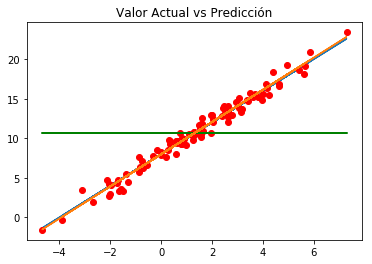

In [43]:
%matplotlib inline
plt.plot(x,y_pred) #Color azul
plt.plot(x,y_act, "ro") #Color rojo
plt.plot(x,y_mean, "g") #Color verde
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [46]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7492110214872536

In [47]:
np.mean(data["y_actual"])

10.711357671813259

In [48]:
RSE/np.mean(data["y_actual"])

0.06994547698269742